# 1: Infiltration of water into a two-layered soil profile


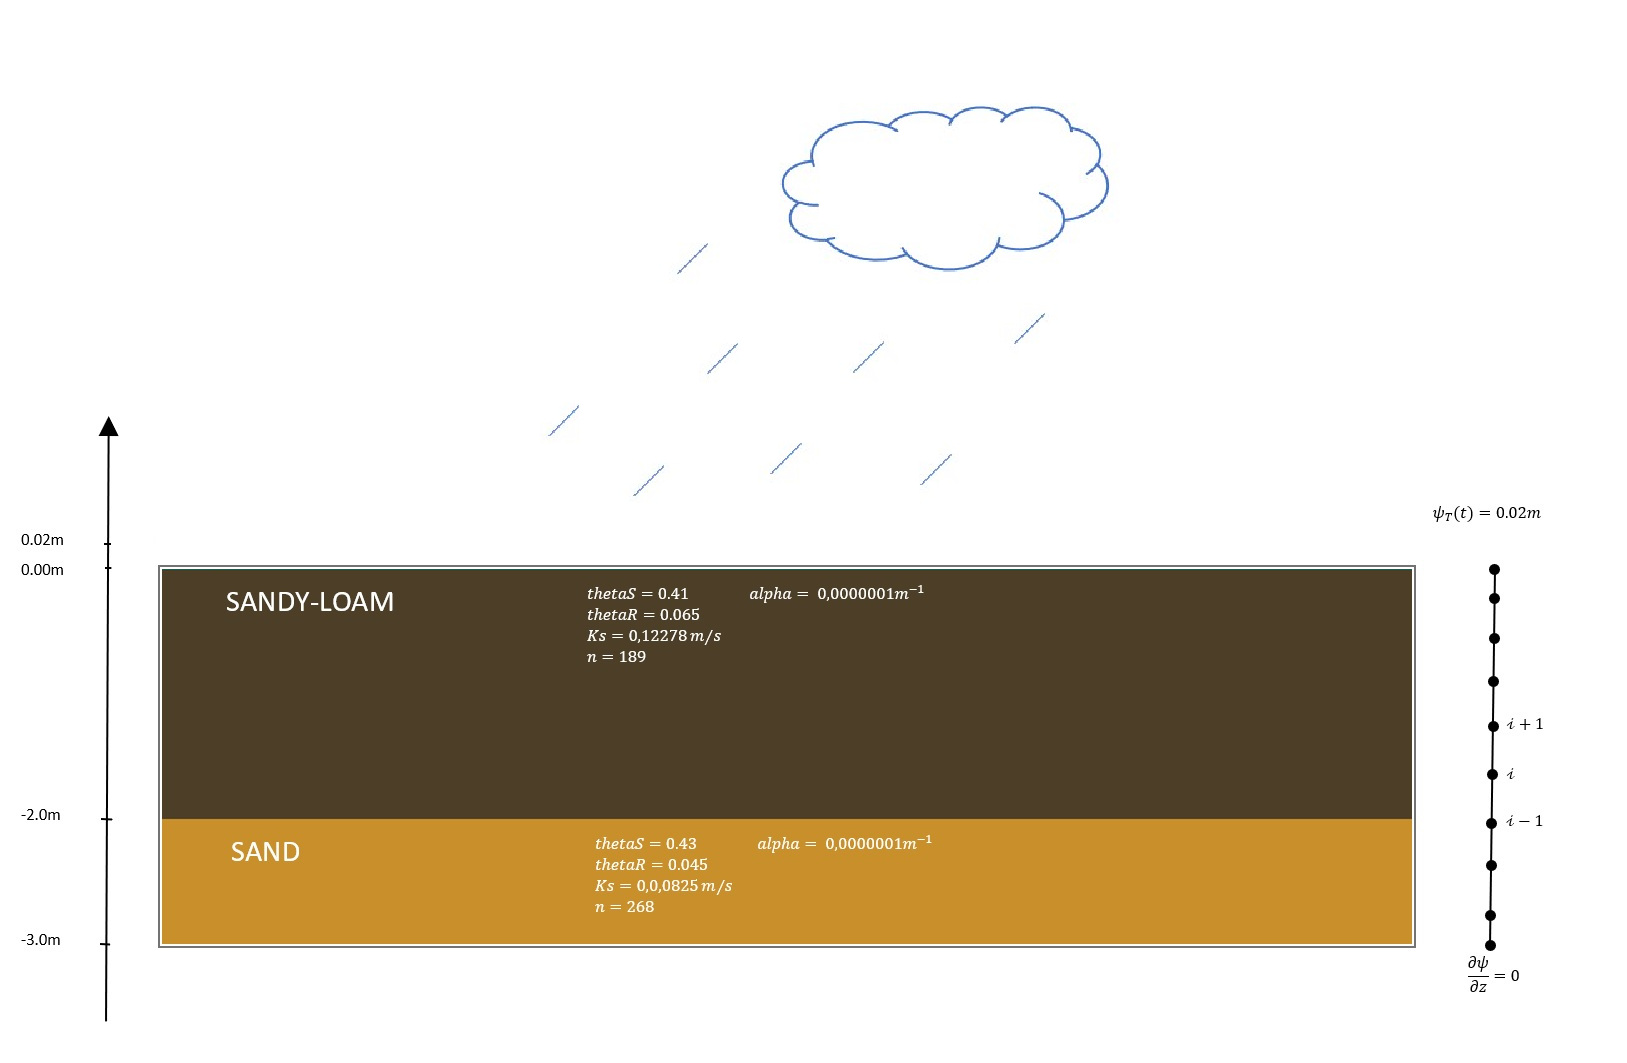

In [1]:
from IPython.display import Image 
import os
os.chdir('C:\\Users\\E580\\Desktop\\UNI\\Idrologia\\Esercitazione3')
Image("SOIL_1_GIUSTO.jpg")

Inizialmente il terreno è insaturo, e assumiamo che il profilo del battente?? di pressione sia idrostatico con pressione dell'acqua pari a $-1$ [m] in basso. Sulla superficie del suolo abbiamo una pozza di $ 0,02 $ [m] di profondità, che rappresenta una condizione al contorno di pressione costante, mentre sul fondo l'acqua drena per gravità, nota anche come condizione al contorno di drenaggio libero.
Il profilo del suolo è costituito da uno strato di terreno di terriccio sabbioso di $ 2,0 $ [m] sostenuto da uno strato di terreno di sabbia di $ 1,0 $ [m].
Nei seguenti notebook è stata trattata una semplificazione del modello, ipotizzandolo 1D. Questo modello vale in condizioni iniziali di idrostaticità, su un versante piano e assumendo la conducibilità idraulica K costante in ogni singolo strato.

Lo scopo di questo notebook è quello di valutare come un terreno stratificato risponde alla filtrazione, in funzione di diverse condizioni. Il fenomeno può essere modellizzato matematicamente attraverso l'equazione di Richards:

$C(ψ)∂(ψ)∂t=∇K(θw)⋅∇(z+ψ)+K(θw)(∇2(x+ψ))$

Per risolvere l'equazione di Richards bisogna in primo luogo definire geometricamente la superficie su cui si opera e successivamente impostare le condizioni iniziali e al contorno.


## 1) Definizione del profilo stratigrafico

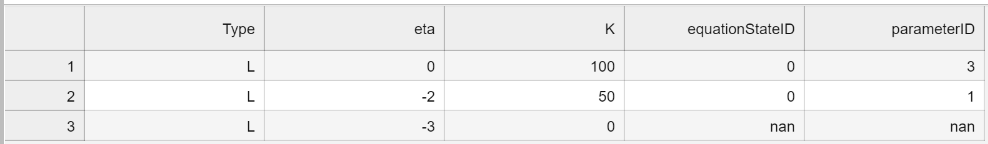

In [37]:
Image("12.jpg")

## 2) Definizione condizioni iniziali

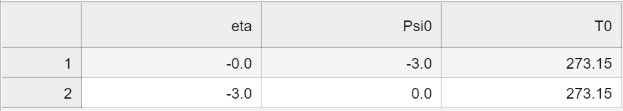

In [38]:
Image("13.jpg")

## 3) creazione file .nc e salvataggio 

In [8]:
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset
from IPython.display import Image

In [9]:
folderPath = "C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3"
grid_input_file_name = folderPath + "/test1_grid.csv"
ic_input_file_name = folderPath + "/test1_ic.csv"
parameter_input_file_name = folderPath + "/Richards_VG.csv"
dictionary_input_file_name = folderPath + "/dictionary.csv"

output_file_name = "C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3/pistachio.nc"
output_title = ''
output_summary =''
output_date = ''
output_institution = 'Geoframe'

grid_type = 'classical'
dz_min = -9999 # not required for grid_type = 'classical'
dz_max = -9999 # not required for grid_type = 'classical'
b = -9999      # not required for grid_type = 'classical'
psi_interp_model = "linear"
T_interp_model = "linear"

In [10]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3/pistachio.nc


## 4) creazione serie temporale con i dati di pioggia

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from datetime import datetime
from geoframepy.timeseries import io_csv
%matplotlib inline
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

In [12]:
rain = io_csv.pandas_read_OMS_timeseries('Precout.csv',datetime_index=False)
rain.head()

,Datetime,0
0,2022-07-05 00:00:00,0.0
1,2022-07-05 00:05:00,0.0
2,2022-07-05 00:10:00,0.0
3,2022-07-05 00:15:00,0.0
4,2022-07-05 00:20:00,0.0


In [13]:
ds = xr.open_dataset(folderPath + '\pistachio_output_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 150, dualDepth: 150, time: 577)
Coordinates:
  * depth             (depth) float64 -2.99 -2.97 -2.95 ... -0.05 -0.03 -0.01
  * dualDepth         (dualDepth) float64 -3.0 -2.98 -2.96 ... -0.06 -0.04 -0.02
  * time              (time) datetime64[ns] 2022-07-05 ... 2022-07-07
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex02 time step 5 minutes.
    Top_boundary_condition:             Top Neumann
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:/Users/E580/Desktop/UNI/Idrologia/E...
    path_bottom_boundary_condition:     C:/Users/E580/Desktop/UNI/Idrologia/E...
    path_grid:                          C:/Users/E580/Desktop/UNI/Idrologia/E...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

## 5) modifica file.sim


Dopo aver creato il file netCDF, si prosegue con la simulazione introducendo il file .sim, dove è possibile trovare informazioni riguardo a:
parametrizzazione SWRC; temperatura del suolo; condizioni al contorno nel dominio di integrazione; time step per integrare l'equazione; file di input;
Successivamente questo file viene caricato all'interno della Console di OMS, con lo scopo di risolvere il problema di Richards.

## 6) plot dei grafici

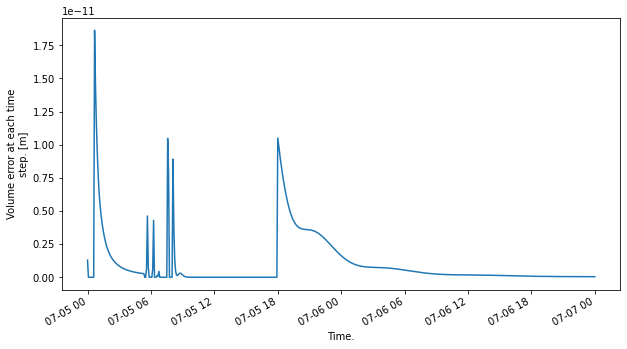

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 
ds.error.plot(ax=ax)
plt.show()

### Andamento precipitazione, suzione e contenuto d'acqua

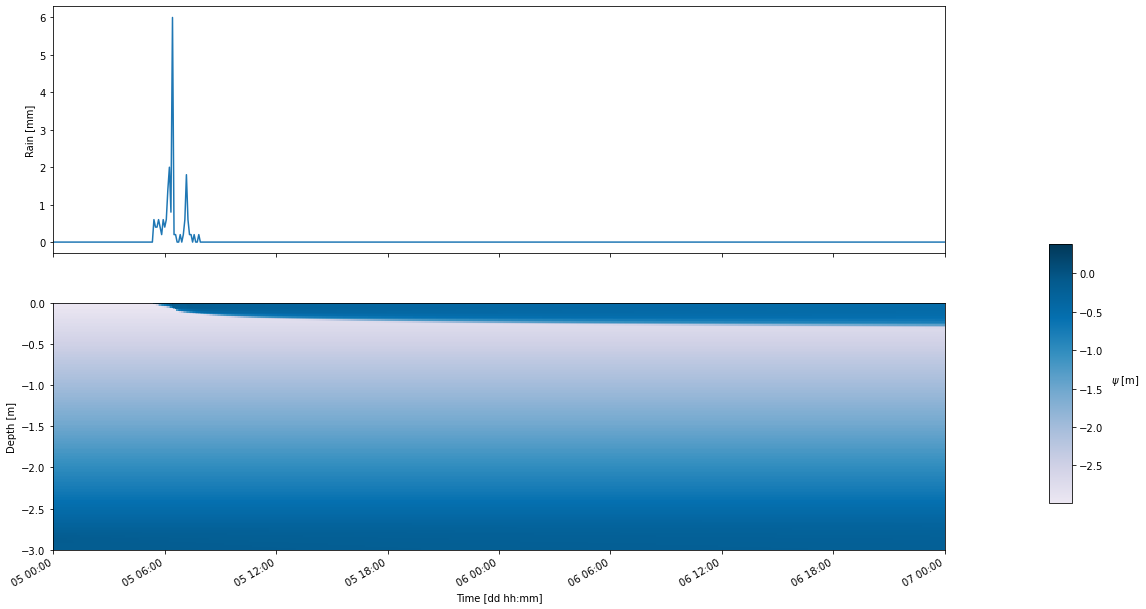

In [15]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(16, 10)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))

cbar_ax = fig.add_axes([0.99, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.show()

In corrispondenza dell'inizio della precipitazione si nota un aumento della suzione, che continua nel tempo a profondità maggiori a causa dell'infiltrazione dell'acqua

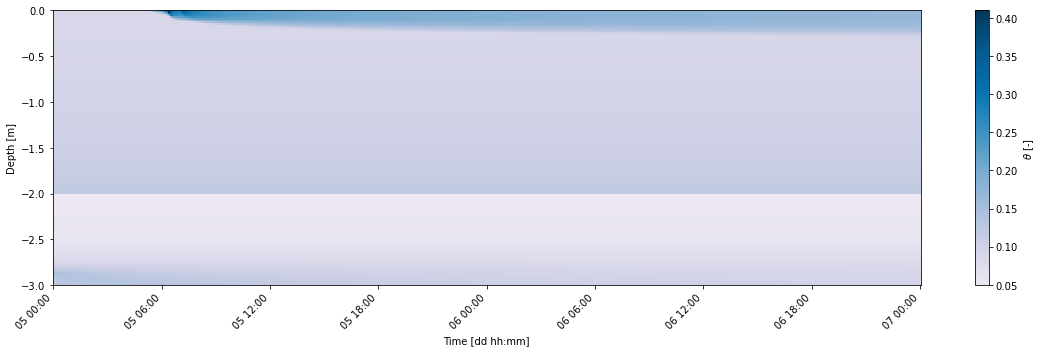

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.theta.values), vmax=np.amax(ds.theta.values))

a = ds.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

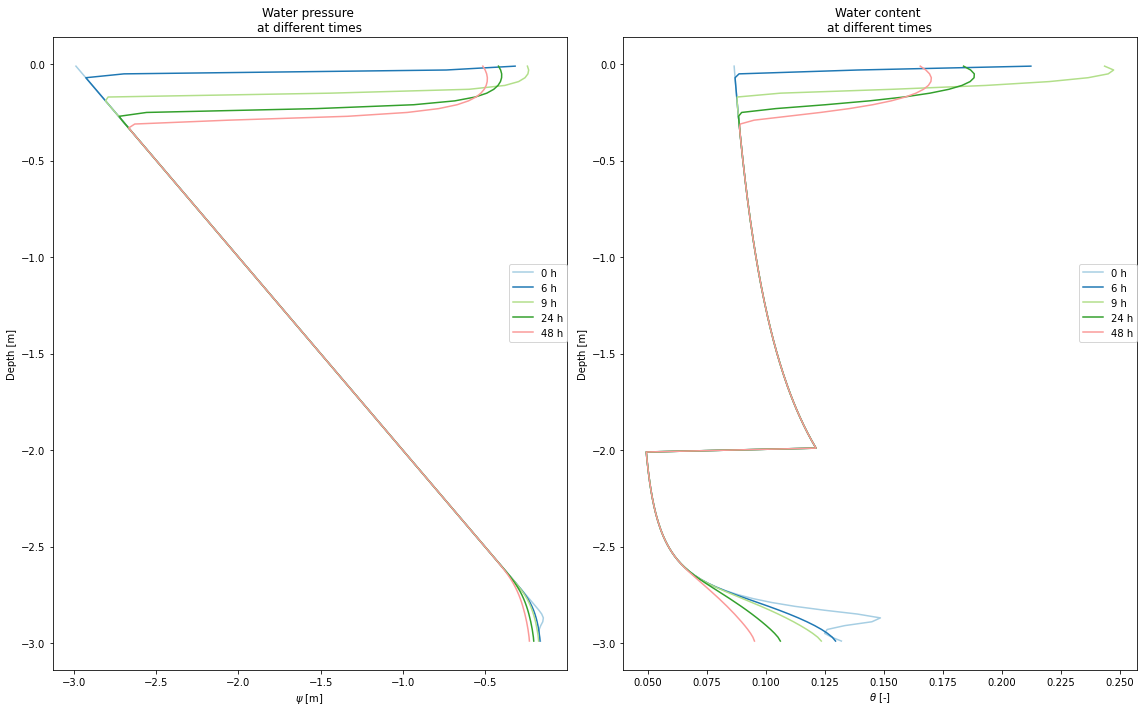

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10)) 

ds.psi.sel(time=datetime.strptime('05/07/22 00:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax1, label = '0 h', color=colors[0])
ds.psi.sel(time=datetime.strptime('05/07/22 06:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax1, label = '6 h', color=colors[1])
ds.psi.sel(time=datetime.strptime('05/07/22 09:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax1, label = '9 h', color=colors[2])
ds.psi.sel(time=datetime.strptime('06/07/22 00:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax1, label = '24 h', color=colors[3])
ds.psi.sel(time=datetime.strptime('07/07/22 00:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax1, label = '48 h', color=colors[4])

ax1.set_title('Water pressure \nat different times')


ax1.set_xlabel('$\psi$ [m]')
ax1.set_ylabel('Depth [m]')

ax1.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

ds.theta.sel(time=datetime.strptime('05/07/22 00:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax2, label = '0 h', color=colors[0])
ds.theta.sel(time=datetime.strptime('05/07/22 06:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax2, label = '6 h', color=colors[1])
ds.theta.sel(time=datetime.strptime('05/07/22 09:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax2, label = '9 h', color=colors[2])
ds.theta.sel(time=datetime.strptime('06/07/22 00:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax2, label = '24 h', color=colors[3])
ds.theta.sel(time=datetime.strptime('07/07/22 00:00:00', '%d/%m/%y %H:%M:%S'), method='nearest').plot(y='depth', ax=ax2, label = '48 h', color=colors[4])

ax2.set_title('Water content \nat different times')


ax2.set_xlabel('$\\theta$ [-]')
ax2.set_ylabel('Depth [m]')

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()



La suzione inizialmente segue il profilo idrostatico, ma durante la precipitazione aumenta nella parte più superficiale del terreno, come il contenuto d'acqua. Dopo l'evento piovoso la suzione e il contenuto d'acqua aumentano in profondità a causa dell'infiltrazione lenta dell'acqua.

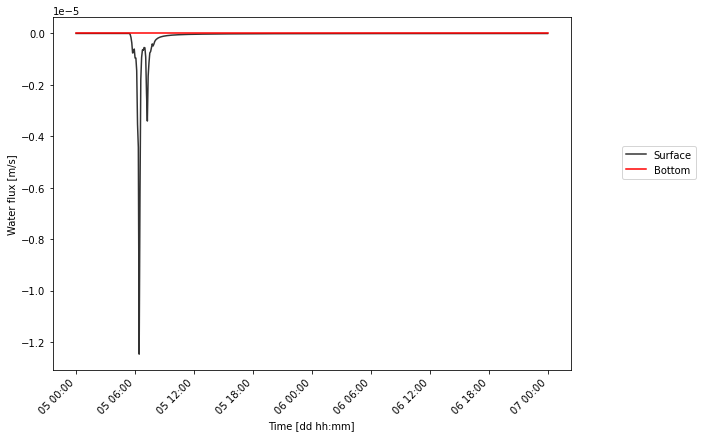

In [19]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

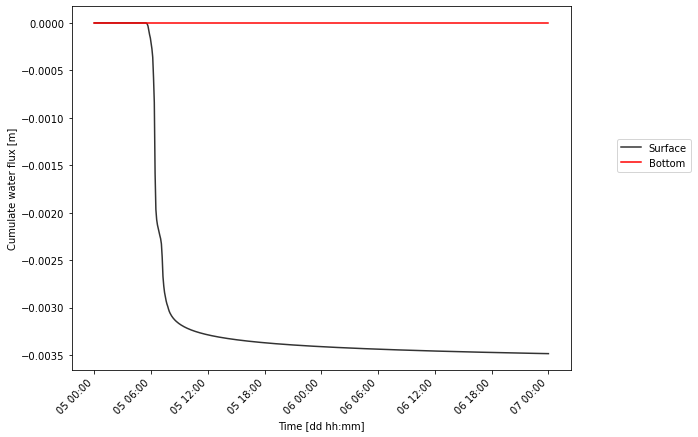

In [20]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

Il flusso in superficie corrisponde all'intensità di precipitazione, mentre il flusso sul fondo è nullo per ipotesi.